In [1]:
!pip install numpy
!pip install pandas
!pip install sklearn
!pip install matplotlib
!pip install tabulate
!pip install seaborn
!pip install graphviz

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
import datetime
from datetime import date
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from datetime import timedelta, date
from sklearn.metrics import mean_squared_error
import sklearn
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz 
from matplotlib import pyplot as plt
from sklearn import tree
import zipfile
import seaborn as sns
import os
import gc
gc.collect()

0

In [3]:
 hpg_reserve = pd.read_csv('hpg_reserve.csv.zip',compression='zip')

In [4]:
def Assining_Variables():
    fle1 = "air_visit_data.csv"
    fle2 = "air_reserve.csv"
    fle3 = "air_store_info.csv"
    fle4 = "date_info.csv"
    fle5 = "store_id_relation.csv"
    fle6 = hpg_reserve
    fle7 = "hpg_store_info.csv"
    fnl_flle = "bk.csv"
    start_dt = date(2022, 4, 23)
    end_dt = date(2712,7, 22)
    llll= []
    return fle1,fle2,fle3,fle4,fle5,fle6,fle7,fnl_flle

In [5]:
def load_dataset(fle1,fle2,fle3,fle4,fle5,fle6,fle7):
    df_air_visit_data = pd.read_csv(fle1)
    df_air_reserve = pd.read_csv(fle2)
    df_air_store_info = pd.read_csv(fle3)
    df_date_info = pd.read_csv(fle4)
    df_store_id_relation = pd.read_csv(fle5)
    df_hpg_reserve = fle6
    df_hpg_store_info = pd.read_csv(fle7)   
    return df_air_visit_data,df_air_reserve,df_air_store_info,df_date_info,df_store_id_relation,df_hpg_reserve,df_hpg_store_info

In [6]:
 def Counting_NAN_Values(dfff):
        df_nan = pd.DataFrame(columns=['Nan count'])
        nan_col = list(dfff.columns.tolist())
        total_nan = 0
        for col in nan_col:
            nan_cnt = dfff[col].isnull().sum()
            df_nan.loc[col] = nan_cnt
            total_nan += nan_cnt
        print(tabulate(df_nan, headers = 'keys', tablefmt = 'psql'))
        return df_nan['Nan count']

In [7]:
def Dataset_Cleaning(dff):
        dfff = dff.isna().sum().sum()
        print("Total NAN values are : {0}".format(dfff))
        dff_nan = dff[pd.isnull(dff).any(axis=1)]
        print("Data with at least 1 NAN values: {0}".format(len(dff_nan.index)))
        df_nan_all = dff[pd.isnull(dff).all(1)]
        print("Rows filled NAN data: {0}".format(len(df_nan_all.index)))
        df_air_store = dff.air_store_id.isnull().sum()
        df_hpg_store = dff.hpg_store_id.isnull().sum()
        print("Count of NAN values on air_store_id are: {0}".format(df_air_store))
        print("Count of NAN values on hpg_store_id are: {0}".format(df_hpg_store))
        nan_ids_df = dff[dff.air_store_id.isnull() & dff.hpg_store_id.isnull()]
        len_invalid_id = len(nan_ids_df.index)
        print("Number of Invalid IDs (both air_store_id & hpg_store_id) are : {0}".format(len_invalid_id))
        df_nadn = Counting_NAN_Values(dff)
        
        """"dff['calendar_date'] = dff['calendar_date'].replace(np.nan, -1)
        dff['day_of_week'] = dff['day_of_week'].replace(np.nan, -1)
        dff['holiday_flg'] = dff['holiday_flg'].replace(np.nan, -1)
        dff['hpg_store_id'] = dff['hpg_store_id'].replace(np.nan, -1)
        #dff.drop(['calendar_date','day_of_week','holiday_flg','hpg_store_id'],axis=1,inplace=True)
        le = LabelEncoder()
        dff[['genre_name', 'area_name']] = dff[['genre_name', 'area_name']].apply(le.fit_transform)"""
        
        #Replacing NAN values of air_store_id,visit_datetime,reserve_datetime,visitors,reserve_visitors, with appropriate constant values
        """"dff[['visit_datetime','reserve_datetime']] = dff[['visit_datetime','reserve_datetime']].replace(np.nan,'9999 00:00:00.000')
        dff[['visitors','reserve_visitors']] = dff[['visitors','reserve_visitors']].replace(np.nan,0.0)
        dff['visit_date'] = dff['visit_date'].replace(np.nan,9999)
        dff[['visitors','reserve_visitors']] = dff[['visitors','reserve_visitors']].astype(int)
        dff[['air_store_id']] = dff[['air_store_id']].replace(np.nan,'air_ba937bf13d40fc25')
        #dff[['visit_datetime','reserve_datetime']] = pd.to_datetime(dff[['visit_datetime','reserve_datetime','visit_date']].astype(str),format='%Y-%m-%d')
        df_nadn = Counting_NAN_Values(dff)"""
        #dff.drop(['genre_name','area_name'],axis=1)
        #print(dff)
        return dfff,df_nadn

In [8]:
def Nan_Percent_Computation(dffff):
        nan_values_cnt,df_nafn = Dataset_Cleaning(dffff)
        total_values_cnt = dffff.shape[0]*dffff.shape[1]
        print("Total Values' Counts are : {0}".format(total_values_cnt))
        total_correct_values_cnt = (total_values_cnt - nan_values_cnt)
        print("Total Correct Values' Counts are : {0}".format(total_correct_values_cnt))
        return total_correct_values_cnt,nan_values_cnt,df_nafn

In [9]:
def Pie_Chart_NAN_Column_Plotting(dft_val1,dfg,total_crt_value_cnt,nan_value_cnt):
    dft = pd.DataFrame({'Data': ['Correct Values', 'NAN Values'],
                          'ValueCount': [total_crt_value_cnt,nan_value_cnt]})
        # Plotting the pie chart for above dataframe
    #dft.groupby(['Data']).sum().plot(kind='pie', y='Value Count', autopct='%1.0f%%')
    # Data to plot
    lab1 = dft.Data.values
    sdd = dft.ValueCount.values
    #sizes = [215, 130,215, 130,215, 130]
    color = ['lightcoral', 'lightskyblue']
    explode1 = (0.1, 0)  # explode 1st slice
    # Plot
    plt.pie(sdd, explode=explode1, labels=lab1, colors=color,autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.show()
   
    # Define the ratio of gap of each fragment in a tuple
    #explode = (0.05, 0.05, 0.05,0.05, 0.05, 0.05,0.05, 0.05, 0.05,0.05, 0.05, 0.05,0.05, 0.05)
    # DataFrame of each student and the votes they get df_nan_disp['Data Name'],df_nan_disp['NAN Count for each Column']
    #dft = pd.DataFrame({'Data Name': dfg.columns,'NAN Count for each Column':dft_val1})
    # Plotting the pie chart for above dataframe
    # Data to plot
    #labels = dfg.columns.values
    #sddd = dft_val1.values
    #sizes = [215, 130,215, 130,215, 130,215, 130,215, 130,215, 130,215, 130]
    #colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
    #explode = (0.1, 0,0.1, 0,0.1, 0,0.1, 0,0.1, 0,0.1, 0,0.1, 0)  # explode 1st slice
    # Plot
    #plt.pie(sddd, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
    #plt.axis('equal')
    #plt.show()

In [28]:
def Final_Dataset():
        fle1,fle2,fle3,fle4,fle5,fle6,fle7,fnl_flle = Assining_Variables()
        df_air_visit_data,df_air_reserve,df_air_store_info,df_date_info,df_store_id_relation,df_hpg_reserve,df_hpg_store_info = load_dataset(fle1,fle2,fle3,fle4,fle5,fle6,fle7)
        #df_air_visit_data,df_air_reserve,df_air_store_info,df_date_info,df_store_id_relation,df_hpg_reserve,df_hpg_store_info = self.load_dataset()
        h1,t1 = os.path.split(fle1)
        h2,t2 = os.path.split(fle2)
        h3,t3 = os.path.split(fle3)
        h4,t4 = os.path.split(fle4)
        h5,t5 = os.path.split(fle5)
        #h6,t6 = os.path.split(fle6)
        h7,t7 = os.path.split(fle7)
        print("The shape of {0} is {1}".format(t1,df_air_visit_data.shape),end="\n")
        print("The shape of {0} is {1}".format(t2,df_air_reserve.shape),end="\n")
        print("The shape of {0} is {1}".format(t3,df_air_store_info.shape),end="\n")
        print("The shape of {0} is {1}".format(t4,df_date_info.shape),end="\n")
        print("The shape of {0} is {1}".format(t5,df_store_id_relation.shape),end="\n")
        print("The shape of hpg_rserve file is {0}".format(df_hpg_reserve.shape),end="\n")
        print("The shape of {0} is {1}".format(t7,df_hpg_store_info.shape),end="\n")
        
        df_n = pd.concat([df_air_visit_data,df_air_reserve], axis=0, join="outer")
        df_nn = pd.merge(df_n,df_air_store_info,on='air_store_id',how="left")
        #df_nn = df_nn.rename(columns = {'air_genre_name':'genre_name','air_area_name':'area_name'})
        hpg_n = pd.merge(df_hpg_store_info,df_hpg_reserve,on='hpg_store_id',how="left")
        #hpg_n = pd.concat([df_hpg_store_info,df_hpg_reserve,], axis=0, join="outer")
        #hpg_n = hpg_n.rename(columns = {'hpg_genre_name':'genre_name','hpg_area_name':'area_name'})
        hpg_nn = pd.merge(hpg_n,df_store_id_relation,on='hpg_store_id',how="left")
        hpg_date = pd.concat([hpg_nn,df_date_info,], axis=0, join="outer")
        df = pd.concat([df_nn,hpg_date], axis=0, join="outer")
        #hpg_date = [hpg_nn,df_date_info]
        #df_date = pd.concat(hpg_date,axis=1)
        #df_nnnn = [df_nn,df_date]
        #df = pd.concat(df_nnnn,axis=0)
        print(df)
        total_crt_value_cnt,nan_value_cnt,df_najn = Nan_Percent_Computation(df)
        #Pie_Chart_Plotting(total_crt_value_cnt,nan_value_cnt)
        df_nan_disp = pd.DataFrame()
        Pie_Chart_NAN_Column_Plotting(df_najn,df,total_crt_value_cnt,nan_value_cnt)
        
        #Printing the number of NANs in each column
        n_rows = len(df)
        for i in range(0,len(df_najn)):
            nan_percent_in_each_col = ((df_najn/n_rows)*100)
            df_nan_disp = pd.DataFrame({'% of NAN Count':nan_percent_in_each_col})
        print(tabulate(df_nan_disp, headers = 'keys', tablefmt = 'psql'))
        #print(df)
        #print(df)
        
        #df = df.dropna(subset=['visitors'],inplace=True)
        #print(df)
       # from sklearn.impute import SimpleImputer
        #df = SimpleImputer(strategy='constant',fill_value='air_8093d0b565e9dbdf')
        """from sklearn.preprocessing import OneHotEncoder
        from sklearn.compose import ColumnTransformer"""
        """cat_feat = ['air_store_id']
        one_hot = OneHotEncoder()
        transformer = ColumnTransformer([("one_hot",one_hot,cat_feat)],remainder="passthrough")
        transformed_X = transformer.fit_transform(df)
        print(transformed_X)"""
        """total_crt_value_cnt1,nan_value_cnt1,df_najn1 = Nan_Percent_Computation(df)
        #Pie_Chart_Plotting(total_crt_value_cnt,nan_value_cnt)
        df_nan_disp1 = pd.DataFrame()
        #Pie_Chart_NAN_Column_Plotting(df_najn1,df,total_crt_value_cnt,nan_value_cnt)
        
        #Printing the number of NANs in each column
        n_rows1 = len(df)
        for i in range(0,len(df_najn1)):
            nan_percent_in_each_col1 = ((df_najn1/n_rows1)*100)
            df_nan_disp1 = pd.DataFrame({'% of NAN Count':nan_percent_in_each_col1})
        print(tabulate(df_nan_disp1, headers = 'keys', tablefmt = 'psql'))"""
        #print(df)
        df.drop(['calendar_date','day_of_week','holiday_flg'],axis=1,inplace=True)
        print(df.air_store_id.value_counts())
        print(df.visit_date.value_counts())
        print(df.visit_datetime.value_counts())
        print(df.reserve_datetime.value_counts())
        print(df.air_genre_name.value_counts())
        print(df.air_area_name.value_counts())
        print(df.hpg_store_id.value_counts())
        print(df.hpg_genre_name.value_counts())
        print(df.hpg_area_name.value_counts())
        print(df.visitors.median())
        print(df.reserve_visitors.median())
        print(df.latitude.median())
        print(df.longitude.median())
        
        """df['air_store_id'] = df['air_store_id'].replace(np.nan,"air_8093d0b565e9dbdf")
        df.drop(df.index[df['air_store_id'] == "air_8093d0b565e9dbdf"], inplace=True)"""
        df.dropna(subset=['visitors'],inplace=True)
        print(df)
        df_nadbjn = Counting_NAN_Values(df)
        df.drop(['reserve_visitors','hpg_area_name','hpg_genre_name','visit_datetime','reserve_datetime','hpg_store_id'],axis=1,inplace=True)
        print(df)



        #print(df[['air_store_id','visit_date','visit_datetime','reserve_datetime','reserve_visitors','genre_name','area_name','latitude','longitude','hpg_store_id']].value_counts())
        #print(df[['air_store_id','visit_date','visitors']])
        return df,fnl_flle

        #df = df[df['air_store_id'] != 9999]
        #df.drop(['air_store_id'],axis=0,inplace=True)
        
        #dff = self.Merge_dataframe(dff)
        
        #print(len(dff[['air_store_id','visit_date','visitors']]))

The shape of air_visit_data.csv is (252108, 3)
The shape of air_reserve.csv is (92378, 4)
The shape of air_store_info.csv is (829, 5)
The shape of date_info.csv is (517, 3)
The shape of store_id_relation.csv is (150, 2)
The shape of hpg_rserve file is (2000320, 4)
The shape of hpg_store_info.csv is (4690, 5)
             air_store_id  visit_date  visitors visit_datetime  \
0    air_ba937bf13d40fb24  13-01-2016      25.0            NaN   
1    air_ba937bf13d40fb24  14-01-2016      32.0            NaN   
2    air_ba937bf13d40fb24  15-01-2016      29.0            NaN   
3    air_ba937bf13d40fb24  16-01-2016      22.0            NaN   
4    air_ba937bf13d40fb24  18-01-2016       6.0            NaN   
..                    ...         ...       ...            ...   
512                   NaN         NaN       NaN            NaN   
513                   NaN         NaN       NaN            NaN   
514                   NaN         NaN       NaN            NaN   
515                   NaN     

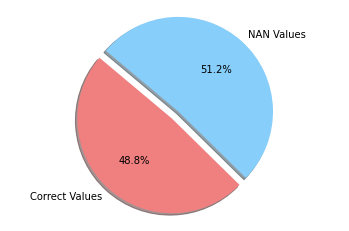

+------------------+------------------+
|                  |   % of NAN Count |
|------------------+------------------|
| air_store_id     |       70.5656    |
| visit_date       |       79.2727    |
| visitors         |       79.2727    |
| visit_datetime   |       20.7698    |
| reserve_datetime |       20.7698    |
| reserve_visitors |       20.7698    |
| air_genre_name   |       71.6778    |
| air_area_name    |       71.6778    |
| latitude         |        0.0425056 |
| longitude        |        0.0425056 |
| hpg_store_id     |       28.3647    |
| hpg_genre_name   |       28.3647    |
| hpg_area_name    |       28.3647    |
| calendar_date    |       99.9575    |
| day_of_week      |       99.9575    |
| holiday_flg      |       99.9575    |
+------------------+------------------+
air_8093d0b565e9dbdf    2731
air_0a74a5408a0b8642    2438
air_e55abd740f93ecc4    2316
air_6d65542aa43b598b    1837
air_cf5ab75a0afb8af9    1811
                        ... 
air_9c6787aa03a45586      

In [29]:
df,fnl_flle = Final_Dataset()

In [12]:
print(df)

                air_store_id  visit_date  visitors       visit_datetime  \
15077   air_f690c42545146e0a  27-01-2016      12.0  2016-12-22 19:00:00   
15078   air_f690c42545146e0a  28-01-2016       8.0  2016-12-22 19:00:00   
15079   air_f690c42545146e0a  29-01-2016      19.0  2016-12-22 19:00:00   
15080   air_f690c42545146e0a  30-01-2016      12.0  2016-12-22 19:00:00   
15081   air_f690c42545146e0a  03-02-2016       3.0  2016-12-22 19:00:00   
...                      ...         ...       ...                  ...   
870368  air_fc477473134e9ae5  17-03-2017       8.0  2017-04-10 20:00:00   
870369  air_fc477473134e9ae5  17-03-2017       8.0  2017-04-14 21:00:00   
870370  air_fc477473134e9ae5  17-03-2017       8.0  2017-04-15 20:00:00   
870371  air_fc477473134e9ae5  17-03-2017       8.0  2017-04-16 21:00:00   
870372  air_fc477473134e9ae5  17-03-2017       8.0  2017-04-23 21:00:00   

           reserve_datetime  reserve_visitors     genre_name  \
15077   2016-12-12 21:00:00        

In [13]:
from sklearn.preprocessing import OneHotEncoder
#onehotencoder = OneHotEncoder(sparse=False,handle_unknown='error',drop='first')


In [14]:
#df = pd.DataFrame(onehotencoder.fit_transform(df[['air_store_id', 'hpg_store_id', 'area_name','genre_name','visit_date','reserve_datetime','visit_datetime']]))
#df                  

In [15]:
from sklearn.preprocessing import LabelEncoder

#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'team' column
df['air_store_id'] = lab.fit_transform(df['air_store_id'])
df['hpg_store_id'] = lab.fit_transform(df['hpg_store_id'])
df['area_name'] = lab.fit_transform(df['area_name'])
df['genre_name'] = lab.fit_transform(df['genre_name'])
df['visit_date'] = lab.fit_transform(df['visit_date'])
df['reserve_datetime'] = lab.fit_transform(df['reserve_datetime'])
df['visit_datetime'] = lab.fit_transform(df['visit_datetime'])
df

,air_store_id,visit_date,visitors,visit_datetime,reserve_datetime,reserve_visitors,genre_name,area_name,latitude,longitude,hpg_store_id
15077,240,411,12.0,1918,5055,2.0,14,24,43.056819,141.353957,0
15078,240,426,8.0,1918,5055,2.0,14,24,43.056819,141.353957,0
15079,240,441,19.0,1918,5055,2.0,14,24,43.056819,141.353957,0
15080,240,455,12.0,1918,5055,2.0,14,24,43.056819,141.353957,0
15081,240,33,3.0,1918,5055,2.0,14,24,43.056819,141.353957,0
...,...,...,...,...,...,...,...,...,...,...,...
870368,247,260,8.0,2574,6908,2.0,0,25,43.055047,141.353236,19
870369,247,260,8.0,2598,6851,15.0,0,25,43.055047,141.353236,19
870370,247,260,8.0,2603,6948,3.0,0,25,43.055047,141.353236,19
870371,247,260,8.0,2610,6972,2.0,0,25,43.055047,141.353236,19


In [16]:
X = df.drop("visitors",axis=1)
y = df['visitors']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
X_train.shape

(15076, 10)

In [19]:
y_train.shape

(15076,)

In [20]:
X_test.shape

(3770, 10)

In [21]:
y_test.shape

(3770,)

In [22]:
X_train

,air_store_id,visit_date,visit_datetime,reserve_datetime,reserve_visitors,genre_name,area_name,latitude,longitude,hpg_store_id
319029,150,260,1885,4706,30.0,10,68,35.659214,139.699736,27
855180,38,260,2061,5493,5.0,2,15,34.392106,132.461914,56
634801,187,260,1586,4242,3.0,4,38,37.869730,138.971623,45
182333,224,349,1918,5055,2.0,12,20,43.770635,142.364819,0
268750,7,260,692,2070,5.0,16,29,34.752826,134.847642,55
...,...,...,...,...,...,...,...,...,...,...
760492,123,260,2239,6051,5.0,19,41,34.701519,135.498859,29
361108,75,260,1657,4423,2.0,10,50,35.677207,139.373870,35
142452,219,260,2513,6758,6.0,16,37,37.914180,139.060023,40
862539,9,260,900,2454,2.0,24,25,43.055047,141.353236,14


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #saga solver requires features to be scaled for model conversion
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
X_train

array([[0.59760956, 0.54621849, 0.6736955 , ..., 0.22641522, 0.67154942,
        0.42857143],
       [0.15139442, 0.54621849, 0.73659757, ..., 0.10918452, 0.15177616,
        0.88888889],
       [0.74501992, 0.54621849, 0.56683345, ..., 0.43092857, 0.61926103,
        0.71428571],
       ...,
       [0.87250996, 0.54621849, 0.89814153, ..., 0.435041  , 0.62560941,
        0.63492063],
       [0.03585657, 0.54621849, 0.32165833, ..., 0.91066564, 0.79029299,
        0.22222222],
       [0.96015936, 0.14495798, 0.68548964, ..., 0.22747335, 0.67672896,
        0.        ]])

In [25]:
def Performance_Evaluation():
    clf = DecisionTreeRegressor(max_depth=10)
    clf.fit(X_train,y_train)
    y_pred_ts = clf.predict(X_test)
    y_pred_tr = clf.predict(X_train)
    print("Predicted values:")
    print(y_pred_ts)
    print ('Training Accuracy:',  clf.score(X_train,y_pred_tr)*100) 
    print ('Test Accuracy:',  clf.score(X_test,y_pred_ts)*100)
    ts_acc = clf.score(X_test,y_pred_ts)*100
    tr_acc = clf.score(X_train,y_pred_tr)*100
    Mean_acc = (((ts_acc+tr_acc)/2))
    print ('Accuracy is: {0}'.format(Mean_acc)) 
    return y_pred_ts,clf,y_pred_tr

In [26]:
y_pred_ts,clf,y_pred_tr = Performance_Evaluation()

Predicted values:
[27.26760563  8.          8.         ...  8.          8.
  8.        ]
Training Accuracy: 100.0
Test Accuracy: 100.0
Accuracy is: 100.0


In [27]:
print("Training before tuning\n")
print ('MAE:', mean_absolute_error(y_train, y_pred_tr))
print ('MSE:', mean_squared_error(y_train, y_pred_tr))
print ('RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_tr)))
print ('RMSLE:', np.log(np.sqrt(mean_squared_error(y_train, y_pred_tr))))
print ('R2:', r2_score(y_train, y_pred_tr))
print("Test before tuning\n")
print ('MAE:', mean_absolute_error(y_test, y_pred_ts))
print ('MSE:', mean_squared_error(y_test, y_pred_ts))
print ('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_ts)))
print ('RMSLE:', np.log(np.sqrt(mean_squared_error(y_test, y_pred_ts))))
print ('R2:', r2_score(y_test, y_pred_ts))

Training before tuning

MAE: 1.5458187794884855
MSE: 29.347844556041558
RMSE: 5.417365093478707
RMSLE: 1.689609552130077
R2: 0.6070427819650281
Test before tuning

MAE: 1.6983246066465962
MSE: 31.31774571851388
RMSE: 5.596226024609253
RMSLE: 1.7220924463752085
R2: 0.5717251993399022


In [28]:
print(clf.get_params())

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [29]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
criterion = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
min_weight_fraction_leaf = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
max_leaf_nodes = [10,20,30,40,50,60,70,80,90,100]
splitter = ["best","random"]
# Maximum number of levels in tree
max_depth = [100,200,300,400,500,600,700,800,900,1000]
#max_depth = [5,17,39,83,171,347,699,1403,2811,5627]
ccp_alpha = [0.000,0.005,0.010,0.015,0.020,0.025,0.030,0.035,0.040,0.045]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,3,4,5,6,7,8,9,10,11]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10,17,26,37,50,65,82]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'criterion':criterion,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'min_weight_fraction_leaf':min_weight_fraction_leaf,
               'max_leaf_nodes':max_leaf_nodes,
               'splitter':splitter,
               'ccp_alpha':ccp_alpha}
print(random_grid)

{'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'min_samples_leaf': [1, 2, 5, 10, 17, 26, 37, 50, 65, 82], 'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'max_leaf_nodes': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'splitter': ['best', 'random'], 'ccp_alpha': [0.0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045]}


In [30]:
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ccp_alpha=0.03, criterion=absolute_error, max_depth=700, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_samples_split=8, min_weight_fraction_leaf=0.2, splitter=best; total time=   2.2s
[CV] END ccp_alpha=0.03, criterion=absolute_error, max_depth=700, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_samples_split=8, min_weight_fraction_leaf=0.2, splitter=best; total time=   1.4s
[CV] END ccp_alpha=0.03, criterion=absolute_error, max_depth=700, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_samples_split=8, min_weight_fraction_leaf=0.2, splitter=best; total time=   2.1s
[CV] END ccp_alpha=0.03, criterion=absolute_error, max_depth=700, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_samples_split=8, min_weight_fraction_leaf=0.2, splitter=best; total time=   1.1s
[CV] END ccp_alpha=0.03, criterion=absolute_error, max_depth=700, max_features=auto, max_leaf_nodes=3

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
205 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
205 fits failed with the following error:
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1320, in fit
    X_idx_sorted=X_idx_sorted,
  File "/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 304, in fit
    raise ValueError("min_weight_fraction_lea

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(max_depth=10),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'ccp_alpha': [0.0, 0.005, 0.01, 0.015,
                                                      0.02, 0.025, 0.03, 0.035,
                                                      0.04, 0.045],
                                        'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [100, 200, 300, 400, 500,
                                                      600, 700, 800, 900,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                           

In [31]:
print(rf_random.best_params_)

{'splitter': 'best', 'min_weight_fraction_leaf': 0.1, 'min_samples_split': 11, 'min_samples_leaf': 50, 'max_leaf_nodes': 60, 'max_features': 'log2', 'max_depth': 900, 'criterion': 'squared_error', 'ccp_alpha': 0.025}


In [32]:
y_pred1 = rf_random.predict(X_test)
y_pred2 = rf_random.predict(X_train)
print("Predicted values:")
print(y_pred1)
print ('Test Accuracy:',  rf_random.score(X_test,y_pred1)*100)
print ('Training Accuracy:',  rf_random.score(X_train,y_pred2)*100) 

Predicted values:
[21.69098549  8.          8.         ...  8.          8.
  8.        ]
Test Accuracy: 100.0
Training Accuracy: 100.0


In [33]:
print("Training after tuning\n")
print ('MAE:', mean_absolute_error(y_train, y_pred2))
print ('MSE:', mean_squared_error(y_train, y_pred2))
print ('RMSE:', np.sqrt(mean_squared_error(y_train, y_pred2)))
print ('RMSLE:', np.log(np.sqrt(mean_squared_error(y_train, y_pred2))))
print ('R2:', r2_score(y_train, y_pred2))
print("Test after tuning\n")
print ('MAE:', mean_absolute_error(y_test, y_pred1))
print ('MSE:', mean_squared_error(y_test, y_pred1))
print ('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred1)))
print ('RMSLE:', np.log(np.sqrt(mean_squared_error(y_test, y_pred1))))
print ('R2:', r2_score(y_test, y_pred1))

Training after tuning

MAE: 2.1890025601885514
MSE: 47.78688029035875
RMSE: 6.912805529621005
RMSLE: 1.9333755654551892
R2: 0.36015064065057834
Test after tuning

MAE: 2.1575812625508366
MSE: 44.78613611307611
RMSE: 6.6922444749931325
RMSLE: 1.9009493148830368
R2: 0.3875429704116691
